In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [4]:
finalFF = np.round(np.array([220, 252, 285, 317, 349, 382, 424, 447])*0.001, 3)

data_path = []
data_path.append('data\\220.txt')
data_path.append('data\\252.txt')
data_path.append('data\\252.txt')
data_path.append('data\\285.txt')
data_path.append('data\\317.txt')
data_path.append('data\\382.txt')
data_path.append('data\\349.txt')
data_path.append('data\\424.txt')
data_path.append('data\\447.txt')

data_label = []
for i in range(8):
    data_label.append('$FF_{{final}}$ = {}'.format(finalFF[i]))
    


In [5]:
data_E = pd.DataFrame({})
data_x = pd.DataFrame({})
for i in range(8):
    data_current = pd.read_csv(data_path[i], sep=",", header=None)
    data_current = data_current.drop([0])  # Drop the first row which contains the old header
    data_current.columns = ['x(m)', 'Y']
    data_current['x(m)'] = pd.to_numeric(data_current['x(m)'])
    data_current['Y'] = pd.to_numeric(data_current['Y'])
    data_x[i] = data_current['x(m)']
    data_E[i] = data_current['Y']



# for i in data['x(m)'].length()
# print(data['x(m)'].isna().sum())

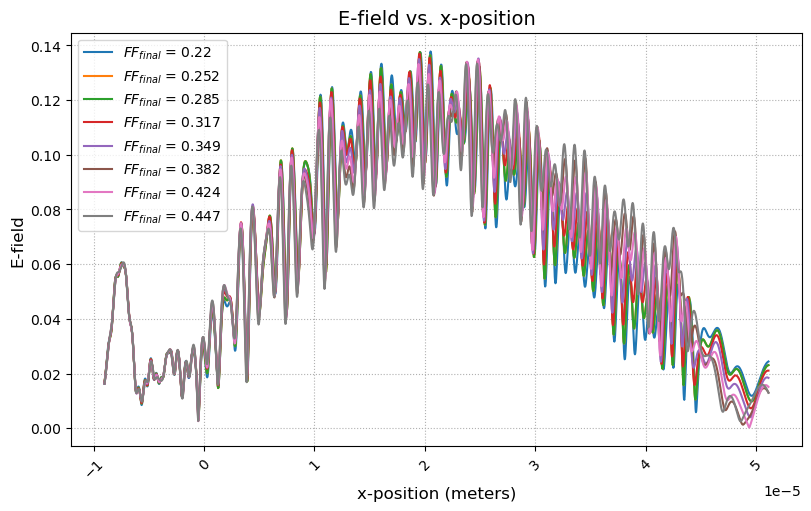

In [7]:
# Plot the data
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
for i in range(8):
    ax.plot(data_x[i], data_E[i], marker='', linestyle='-', label = data_label[i])

# Use scientific notation for x-axis tick labels if appropriate
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Increase label font size for readability and add a title
ax.set_xlabel('x-position (meters)', fontsize=12)
ax.set_ylabel('E-field', fontsize=12)
ax.set_title('E-field vs. x-position', fontsize=14)

# Rotate x-axis tick labels to prevent overlap
ax.tick_params(axis='x', labelrotation=45, labelsize=10)

# Show grid
ax.grid(True, linestyle = ':')
ax.legend()
plt.show()
fig.savefig('Up_E_overlay.png', dpi=300)